#  Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
from numpy import arange, array, sqrt
import matplotlib.pyplot as plt

# (b) Newman 8.8 Space Garbage


In this question, we will investigate the trajectory of a ball bearing orbiting around a rod due to gravitational pull. The equations of motion for the positions $x$,$y$ of the ball bearing in the $xy$-plane are: 
\begin{equation} 
\frac{\partial x^2 }{\partial t^2}=-GM\frac{x}{r^2\sqrt{r^2+L^2/4}},
\end{equation}
\begin{equation}
\frac{\partial y^2 }{\partial t^2}=-GM\frac{y}{r^2\sqrt{r^2+L^2/4}},
\end{equation}

where $G$ is Newton's gravitational constant (we will assume $G=1$), $M$ is mass of rod (we take $M=10$), $L$ is the length of rod(we take $L=2$), $t$ is the time, and we define $r=\sqrt{x^{2}+y^{2}}$.

We will use the fourth-order Runge-Kutta Method to solve the two second-order equations. First, we convert these two second-order equations into four first-order equations.
\begin{align}
\frac{\mathrm{d} x}{\mathrm{d} t}&=v_{x} & \frac{\mathrm{d} v_{x}}{\mathrm{d} t}&=-GM\frac{x}{r^2\sqrt{r^2+L^2/4}} \\
\frac{\mathrm{d} y}{\mathrm{d} t}&=v_{y} & \frac{\mathrm{d} v_{y}}{\mathrm{d} t}&=-GM\frac{y}{r^2\sqrt{r^2+L^2/4}}
\end{align}
The initial condition is given by (x,y)=(1,0) with velocity of +1 in the y direction.
We will calculate the orbit from t=0 to t=10 and make a plot of y against x.

In [2]:
#set the initial values
G=1  #Newton's gravitational constant with unit 1
M=10 #Mass of rod
L=2 #length of rod

Here we define the Function $f(r,t)$. The function will take two parameters $r$ and $t$, where $t$ is the time. $r$ is an array of four elements. The first element corresponds to position x, the second element corresponds to position $y$, the third element correspond to $v_x$ (velocity in $x$ direction) and last elemnet corresponds to $v_y$ (velocity in $y$ direction). Then, we will define the four first-order differential equations above. Finally, the function will return the array consisting of four elements corresponding to $x,y$ positions and velocity in $x$ and $y$ directions. 

In [3]:
#define the function as array r and time t
def f(r):
    ''' Function to perform calculations of defined equations
    INPUT: position & velocity vector
    OUTPUT: four first order equation calulations at point'''
    #assign the  values
    x=r[0] #position in x
    y=r[1] #position in y
    vx=r[2] #velocity in x direction
    vy=r[3] #velocity in y direction
	# r is the distance from origin to ball bearing
    r = sqrt(x**2+y**2)
    #Use four first-order equations 
    fx = vx
    fy = vy
    fvx = - G*M/((r**2)*sqrt(r**2 + (L**2)/4))* x
    fvy = - G*M/((r**2)*sqrt(r**2 + (L**2)/4))* y
	# output array of x,y positions and x,y velocities
    return array([fx,fy,fvx,fvy],float)

Now we prepare to solve the system of coupled equations by iterating over several time steps using the Runge-Kutta Method. We set the time interval from t=0 to t=10 and we will use 1000 number of points 

In [4]:
a=0.0 #set the start time
b=10.0 #set the end time
N=1000 #set number of points
h=(b-a)/N #set the width between each points
tpoints=arange(a,b,h) #create time array 
#create empty array for poisition x,y velocities vx, vy
xpoints=[]
ypoints=[]
vxpoints=[]
vypoints=[]
#create array 'r' with initial condition x=1 y=0 vx=0 vy=1
r=array([1.0,0.0,0.0,1],float)

Use 'for loop' in time and use the formula for the fourth-order Runge-Kutta Method to get the x,y positions and velocites in x and y directions for each time.

In [5]:
for t in tpoints:  #loop the time
    ''' USING RUNGE-KUTTA METHOD'''
    # append calculated x,y,vx,vy values for each time
    xpoints.append(r[0]) 
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    # Formula for RK4 - taken from textbook (Newman pg 345)
    # Note: Here our function has no explicit dependance on t
    # therefore we ignored it in the definition of our function
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6

With the coupled system numerically solved, we have 4 arrays with all the information about the trajectory over the 10s. Now we plot the graph of position y against position x from t=0 to t=10.

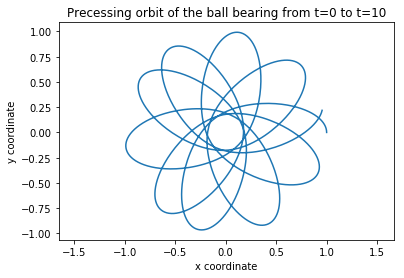

In [6]:
#plot the graph of y against x
plt.plot(xpoints,ypoints)
#Set equal scaling  by changing axis limits
plt.axis('equal')
plt.title("Precessing orbit of the ball bearing from t=0 to t=10")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

We observe that the ball bearing has a precessing orbit due to the fact that attractive force is not the form of $1/r^2$. But still cool!